In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/retail_store_sales.csv")

df = data.copy()

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [6]:
df[["prefix","item_number","item_type"]] = df["Item"].str.split("_",expand = True)
df = df.drop(columns="prefix")


In [7]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,10,PAT
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,17,MILK
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,12,BUT
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,16,BEV
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,6,FOOD


In [8]:
df = df.drop(columns="Item")

In [9]:
df.head()

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,10,PAT
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,17,MILK
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,12,BUT
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,16,BEV
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,6,FOOD


In [10]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
item_number         1213
item_type           1213
dtype: int64

In [11]:
df["item_number"] = pd.to_numeric(df["item_number"])

In [12]:
c1 = df.select_dtypes(["float","int"]) # numeric column

c2 = ["item_type","Discount Applied"] # object column

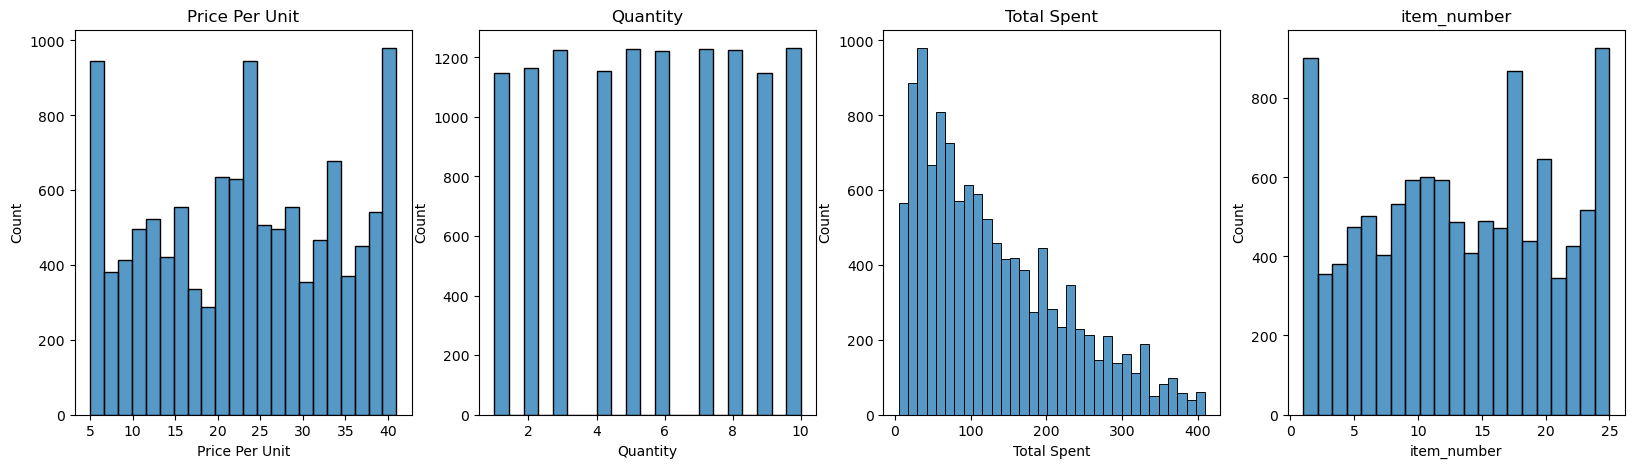

In [13]:
fig,axs = plt.subplots(1,4,figsize=(20,5))

for i in range(4):
    sns.histplot(data = df, x=c1.columns[i],ax=axs[i])
    axs[i].set_title(c1.columns[i])

plt.show()

In [14]:
for i in c1.columns:
    df[i] = df[i].fillna(df[i].median())

for j in c2:
    df[j] = df[j].fillna(df[j].mode()[0]).infer_objects(copy=False)

df.isnull().sum()

/tmp/ipykernel_97495/1979508160.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[j] = df[j].fillna(df[j].mode()[0]).infer_objects(copy=False)


Transaction ID      0
Customer ID         0
Category            0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
item_number         0
item_type           0
dtype: int64

In [15]:
df = df.drop(columns=["Transaction ID","Customer ID"])

In [16]:
df["item_number"] = df["item_number"].astype(int)

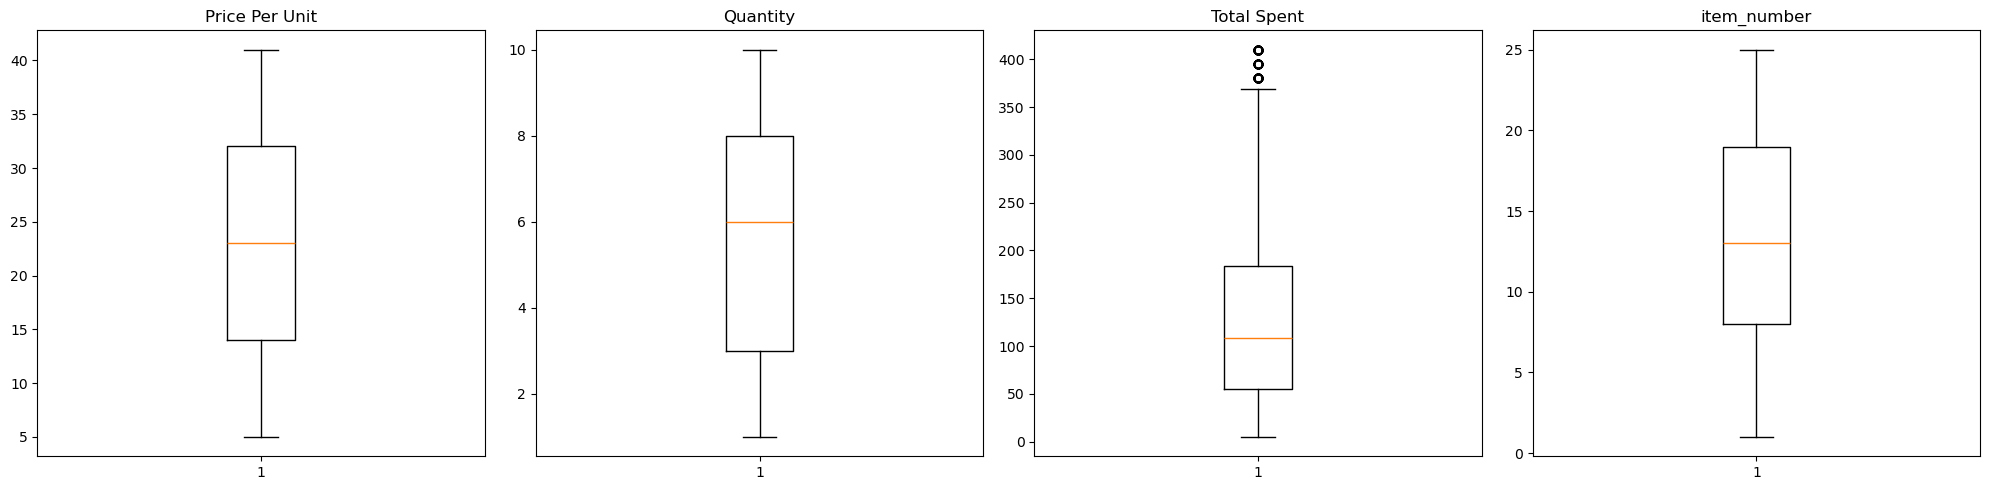

In [17]:
c3 = df.select_dtypes(["int","float"])
fig,axs = plt.subplots(1,4,figsize=(20,5))

for i in range(4):
    axs[i].boxplot(df[c3.columns[i]])
    axs[i].set_title(c3.columns[i])
plt.tight_layout()
plt.show()

In [18]:
Q1 = np.percentile(df["Total Spent"],25,method = "midpoint")
Q3 = np.percentile(df["Total Spent"],75,method = "midpoint")

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outlier = df[(df["Total Spent"]>upper)|(df["Total Spent"]<lower)]
outlier_list = outlier["Total Spent"].tolist()

print(outlier_list)
outlier.head()

[410.0, 380.0, 395.0, 410.0, 395.0, 395.0, 410.0, 380.0, 380.0, 410.0, 380.0, 395.0, 410.0, 410.0, 395.0, 380.0, 380.0, 395.0, 410.0, 410.0, 410.0, 395.0, 380.0, 380.0, 395.0, 410.0, 410.0, 380.0, 410.0, 410.0, 410.0, 380.0, 380.0, 395.0, 395.0, 410.0, 380.0, 410.0, 380.0, 380.0, 395.0, 395.0, 410.0, 410.0, 380.0, 380.0, 380.0, 410.0, 395.0, 380.0, 395.0, 395.0, 395.0, 380.0, 380.0, 410.0, 395.0, 380.0, 410.0, 380.0, 395.0, 395.0, 410.0, 380.0, 380.0, 380.0, 380.0, 410.0, 410.0, 410.0, 380.0, 395.0, 410.0, 380.0, 395.0, 410.0, 410.0, 380.0, 395.0, 395.0, 410.0, 380.0, 410.0, 380.0, 380.0, 395.0, 380.0, 380.0, 410.0, 380.0, 410.0, 380.0, 395.0, 410.0, 410.0, 380.0, 410.0, 395.0, 410.0, 380.0, 380.0, 380.0, 380.0, 380.0, 410.0, 380.0, 410.0, 410.0, 380.0, 380.0, 410.0, 410.0, 380.0, 395.0, 380.0, 380.0, 380.0, 410.0, 410.0, 410.0, 395.0, 410.0, 410.0, 380.0, 410.0, 395.0, 395.0, 410.0, 395.0, 380.0, 380.0, 395.0, 380.0, 380.0, 395.0, 380.0, 410.0, 395.0, 410.0, 395.0, 410.0, 410.0, 395.0

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
27,Furniture,41.0,10.0,410.0,Credit Card,In-store,2024-03-24,True,25,FUR
120,Milk Products,38.0,10.0,380.0,Digital Wallet,In-store,2024-03-16,True,23,MILK
129,Food,39.5,10.0,395.0,Cash,Online,2023-09-24,True,24,FOOD
133,Furniture,41.0,10.0,410.0,Credit Card,In-store,2023-08-10,True,25,FUR
135,Milk Products,39.5,10.0,395.0,Digital Wallet,Online,2024-03-21,True,24,MILK


In [19]:
df["Transaction Date"] = (df["Transaction Date"].str.replace("-","").str.replace(" ","")).astype(int)

In [20]:
df.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
0,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,20240408,True,10,PAT
1,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,20230723,True,17,MILK
2,Butchers,21.5,2.0,43.0,Credit Card,Online,20221005,False,12,BUT
3,Beverages,27.5,9.0,247.5,Credit Card,Online,20220507,True,16,BEV
4,Food,12.5,7.0,87.5,Digital Wallet,Online,20221002,False,6,FOOD


In [21]:
c4 = df.select_dtypes(["object","boolean"])

c4.head()

,Category,Payment Method,Location,Discount Applied,item_type
0,Patisserie,Digital Wallet,Online,True,PAT
1,Milk Products,Digital Wallet,Online,True,MILK
2,Butchers,Credit Card,Online,False,BUT
3,Beverages,Credit Card,Online,True,BEV
4,Food,Digital Wallet,Online,False,FOOD


In [22]:
c4.nunique()

Category            8
Payment Method      3
Location            2
Discount Applied    2
item_type           8
dtype: int64

In [23]:
le = LabelEncoder()

for i in c4.columns:
    df[i] = le.fit_transform(df[i])

In [24]:
df.head()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
0,7,18.5,10.0,185.0,2,1,20240408,1,10,7
1,6,29.0,9.0,261.0,2,1,20230723,1,17,6
2,1,21.5,2.0,43.0,1,1,20221005,0,12,1
3,0,27.5,9.0,247.5,1,1,20220507,1,16,0
4,4,12.5,7.0,87.5,2,1,20221002,0,6,4


In [25]:
c5 = ["Price Per Unit","Quantity","Transaction Date","item_number"]

mm = MinMaxScaler()

df[c5] = mm.fit_transform(df[c5])

In [26]:
df.describe()

,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,item_number,item_type
count,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000,12575.000000
mean,3.496143,0.509672,0.506516,128.636581,0.986799,0.505288,0.365631,0.669423,0.508956,3.636421
std,2.282247,0.291123,0.310018,92.557580,0.819857,0.499992,0.284720,0.470439,0.283489,2.214764
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.250000,0.222222,55.000000,0.000000,0.000000,0.027618,0.000000,0.291667,2.000000
50%,4.000000,0.500000,0.555556,108.500000,1.000000,1.000000,0.353533,1.000000,0.500000,4.000000
75%,5.000000,0.750000,0.777778,184.000000,2.000000,1.000000,0.677050,1.000000,0.750000,5.000000
max,7.000000,1.000000,1.000000,410.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [27]:
x = df.drop("Total Spent",axis=1)
y = df[["Total Spent"]]

In [28]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.25,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [30]:
model = lr.fit(x_train,y_train)

In [31]:
y_predict = model.predict(x_test)

In [32]:
print(y_predict)

[[100.35222634]
 [ 52.98083554]
 [ -1.14636894]
 ...
 [141.4017799 ]
 [-31.58225262]
 [ 90.67312882]]


In [33]:
print(y_test)

       Total Spent
6209          87.0
7454          48.0
530           33.0
7708          40.0
3931         160.0
...            ...
11964        120.0
5191          65.0
5390          65.0
860           15.0
7270          92.0

[9431 rows x 1 columns]


In [34]:
from sklearn.metrics import r2_score

print(f"r2score = {r2_score(y_test,y_predict)}")

r2score = 0.8690104737187635
